Successfully loaded data from: C:/Users/joshu/OneDrive/Desktop/ApplesML/data/Detect-RG.xlsx
                 Sample Condition Age Source  11995.49  11991.63  11987.78  \
0  RG-ch-bruise1.5h-10a         B  1h     S1 -0.073562 -0.073781 -0.073957   
1  RG-ch-bruise1.5h-10b         B  1h     S1 -0.109298 -0.109838 -0.110297   
2  RG-ch-bruise1.5h-10c         S  1h     S1 -0.110615 -0.111461 -0.111813   
3  RG-ch-bruise1.5h-10d         S  1h     S1 -0.114786 -0.115564 -0.116114   
4  RG-ch-bruise1.5h-11a         B  1h     S1 -0.146608 -0.147469 -0.147789   

   11983.92  11980.06  11976.21  ...  4034.497   4030.64  4026.783  4022.926  \
0 -0.073707 -0.072784 -0.072192  ...  1.431078  1.421277  1.418090  1.420809   
1 -0.110122 -0.109260 -0.108452  ...  1.101811  1.095996  1.094685  1.095122   
2 -0.111651 -0.110756 -0.109691  ...  1.125451  1.127347  1.123727  1.117350   
3 -0.115950 -0.115114 -0.114281  ...  1.137944  1.131435  1.129920  1.137164   
4 -0.147515 -0.146668 -0.145834  ...  0

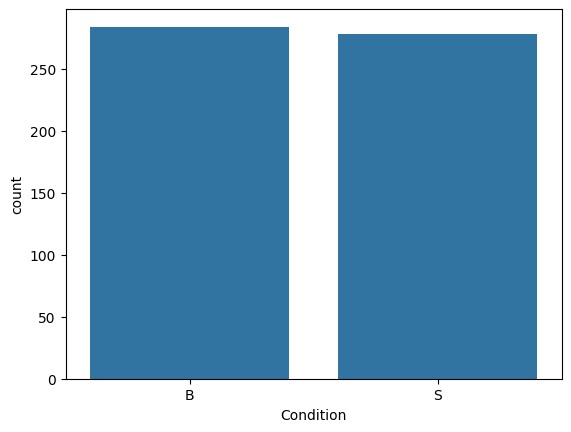

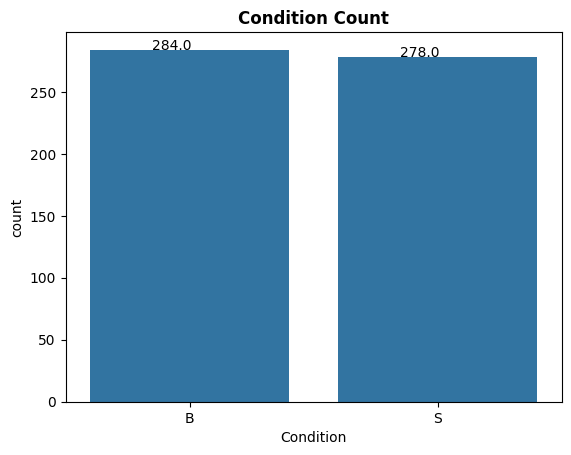

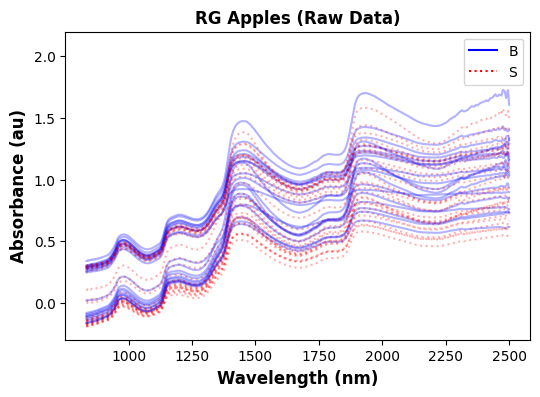

Stored 'X' (DataFrame)
Stored 'Y' (Series)
Stored 'df' (DataFrame)


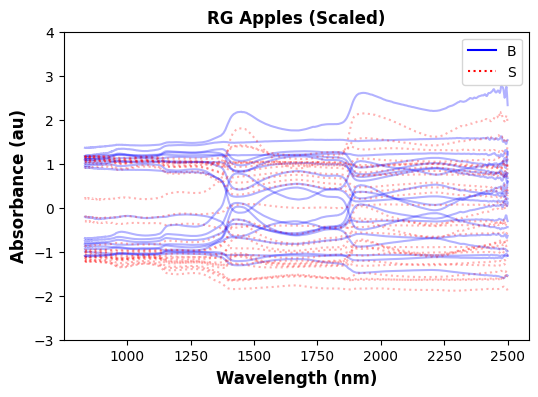

(562, 2074)
0      0
1      0
2      1
3      1
4      0
      ..
557    1
558    0
559    0
560    1
561    1
Name: Condition, Length: 562, dtype: int64
Train shapes: (393, 2074) (393,)
Accuracy score is 0.8284023668639053
Precision score is 0.7777777777777778


In [1]:
# Royal Gala Apples (GD)

# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

# Load Excel Data
file_path = 'C:/Users/joshu/OneDrive/Desktop/ApplesML/data/Detect-RG.xlsx'
df = pd.read_excel(file_path)
print(f"Successfully loaded data from: {file_path}")

# View first 5 rows
print(df.head())

# Shape of dataset
df_shape = df.shape
print(f"The shape of the infrared intensity data is {df_shape}")
print(f"Where {df_shape[0]} is the number of rows, and {df_shape[1]} is the number of columns.")

# Convert wavenumbers to wavelengths
wavenumbers = np.float64(df.columns[4:])
wavelengths = (1 / wavenumbers) * 1e7
print(f"\nExample: wave number {wavenumbers[0]} in inverse centimeters converts to a wavelength of {wavelengths[0]} nm\n")
df.columns.values[4:] = np.round(wavelengths, 3)
print(df.head())

# Condition Count
ax = sns.countplot(x="Condition", data=df)
plt.show()

# Normalize Condition column (make uppercase)
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + 0.25, p.get_height() + 0.01))

plt.title("Condition Count", fontsize=12, fontweight='bold')
plt.show()

# Features (X) and Labels (Y)
X = df.iloc[:, 4:]
Y = df['Condition']

np.random.seed(42)
n = 50
randIx = np.random.choice(len(df), n, replace=False)


# Convert to numpy arrays
Xn = X.to_numpy(dtype='float')[randIx, :]
Yn = Y.to_numpy(dtype='str')[randIx]

S_Flag = (Yn == 'S')
B_Flag = (Yn == 'B')

# Plot before scaling (Fixed)
plt.figure(figsize=(6, 4))
for i in range(n):
    if B_Flag[i]:
        plt.plot(X.columns, Xn[i], 'b-', alpha=0.3)
    elif S_Flag[i]:
        plt.plot(X.columns, Xn[i], 'r:', alpha=0.3)
plt.plot([], [], 'b-', label='B')
plt.plot([], [], 'r:', label='S')
plt.title("RG Apples (Raw Data)", fontsize=12, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=12, fontweight='bold')
plt.ylabel("Absorbance (au)", fontsize=12, fontweight='bold')
plt.ylim([-0.3, 2.2])
plt.legend()
plt.show()

# Scaling Inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Store variables to reuse in second notebook
%store X
%store Y
%store df

# Plot after scaling (Fixed)
Xn = X.to_numpy(dtype='float')[randIx, :]
Yn = Y.to_numpy(dtype='str')[randIx]
S_Flag = (Yn == 'S')
B_Flag = (Yn == 'B')

plt.figure(figsize=(6, 4))
for i in range(n):
    if B_Flag[i]:
        plt.plot(X.columns, Xn[i], 'b-', alpha=0.3)
    elif S_Flag[i]:
        plt.plot(X.columns, Xn[i], 'r:', alpha=0.3)
plt.plot([], [], 'b-', label='B')
plt.plot([], [], 'r:', label='S')
plt.title("RG Apples (Scaled)", fontsize=12, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=12, fontweight='bold')
plt.ylabel("Absorbance (au)", fontsize=12, fontweight='bold')
plt.ylim([-3, 4])
plt.legend()
plt.show()


# Royal Gala Apples 2 (GS)

# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

import sys
sys.path.append("..")
from source.utils import split  # assuming your custom split function is correctly implemented

# Restore stored variables from previous notebook
%store -r X
%store -r Y
%store -r df

print(X.shape)  # should work now since X was stored

# Convert target labels to binary
Y = Y.map({'S': 1, 'B': 0})
print(Y)

# Train/test split
Xtrain, Xtest, Ytrain, Ytest = split(X, Y)
print("Train shapes:", Xtrain.shape, Ytrain.shape)

# Train Logistic Regression
LR = LogisticRegression(random_state=0, solver="newton-cg")
LR.fit(Xtrain.values, Ytrain)

# Predictions & Evaluation
y_pred = LR.predict(Xtest)

print("Accuracy score is", accuracy_score(Ytest.values, y_pred))
print("Precision score is", precision_score(Ytest.values, y_pred))